# Inferential Statistics 1b - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
sample_size = medical.shape[0]
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

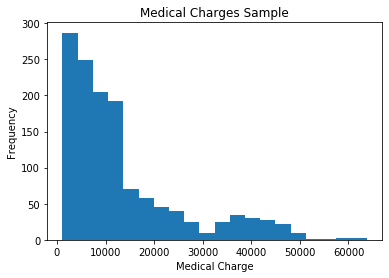

Medical Charges 
---------------
     Sample Mean: $13,270.42
Sample Statistic: $12,110.01


In [4]:
plt.hist(medical.charges, bins=20)
plt.title('Medical Charges Sample')
plt.xlabel('Medical Charge')
plt.ylabel('Frequency')
plt.show()

ch_mean = np.mean(medical.charges)
ch_std = np.std(medical.charges, ddof=1)

def dollars(number): 
    return ("{:,}".format(number)) 
print('Medical Charges \n---------------')
print('     Sample Mean: ${:.9}'.format(dollars(ch_mean)))
print('Sample Statistic: ${:.9}'.format(dollars(ch_std)))

>__A:__ Since the medical charges sample data is very skewed to the left, i.e. positively skewed, the charges' mean and standard deviation do not give a good representation as to how the sample is distributed; just by looking at the mean and the standard deviation we cannot tell the skewness of the sample charge data which can be seen from plotting its histogram. If we try to understand the charge data solely on the obtained sample mean and statistic, those statistics would say that there is a significant probability that the client would get paid to come in for a visit; -2 standard deviations say that a client would get paid about $10,949.60 for a visit.

__Q:__ The administrator is concerned that the actual average charge has fallen below $12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

>__A:__ In order to answer these questions using the frequentist approach, we are going to need the CLT's assumptions to be met; the two main considerations for the CLT to work are that the sample is independent and identically distributed. A sample is classified as independent if the sample was taken randomly without replacement and constitutes less than 10% of the population size; given that our sample has 1,338 client visits, we can assume that that is less than 10% of the total visits the hospital has seen, and we have been told that the observations we have were randomly selected. Therefore, the independent aspect of the CLT is met. In terms of the sample being identically distributed, it simply means that a single observation is being statistically analyzed with the same distribution containing that observation. Because both of the CLT conditions are met, we can use its statistical methods to answer the questions being asked with the given data. Further, when deciding what frequentist test to use, we have to look at the requirements of each; the two frequentist tests we have looked at so far use either the z-score or the t-score. Whenever we know the population's standard deviation, i.e. population parameter, and have a large sample size, usually 30+ samples, we can use the z-score, but when one of those two requirements are not met, we have to use the t-score; since we do not know the population parameter, we will be using the t-score to conduct the frequentist tests.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

In [5]:
# other statistics required to calculate interval
ch_std_err = ch_std / np.sqrt(sample_size)
ch_t = t.ppf(0.05, df=sample_size-1)
ch_moe = ch_t * ch_std_err
ch_int = ch_mean + ch_moe

In [6]:
print('Sample Size: {} |\n------------------\n'.format(sample_size), 
      '   Charges Mean: ${:8.9}\n'.format(dollars(ch_mean)), 
      '    Charges Std: ${:8.9}\n'.format(dollars(ch_std)),             
      'Charges Std Err: ${:9.2f}\n'.format(ch_std_err),             
      ' (0.5%) T-Score:  {:9.2f}\n'.format(ch_t),       
      'Margin of Error: ${:9.2f}\n'.format(ch_moe),
      '  Mean Interval: ${:8.9}+'.format(dollars(ch_int)))

Sample Size: 1338 |
------------------
    Charges Mean: $13,270.42
     Charges Std: $12,110.01
 Charges Std Err: $   331.07
  (0.5%) T-Score:      -1.65
 Margin of Error: $  -544.94
   Mean Interval: $12,725.48+


>__A:__ Since the administrator only wants to know whether or not the mean charge per visit has dropped below \\$12,000 and not whether it is exactly \\$12,000, we only care about the lower interval. After calculating the sample's margin of error, we can conclude with more than 95% confidence that the mean charge per visit is not lower than \\$12,000; in fact, with 95% confidence we can say that the hospital's mean charge per visit is equal to or greater \\$12,725.49.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{1/n_1 + 1/n_2}} \ ; \ \ {df = n_1 + n_2 - 2}
\end{equation}

What assumption about the variances of the two groups are we making here?

>__A:__ In order to perform the t-test using the formulas above, we have to assume that the variances of the two groups are equal. The null and alternate hypotheses can be seen below:

\begin{equation}
H_0: u_1 = u_2, \\
H_a: u_1 \neq u_2
\end{equation}

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [7]:
ins_no = medical.charges[medical.insuranceclaim == 0]
ins_yes = medical.charges[medical.insuranceclaim == 1]

mean_no = np.mean(ins_no)
std_no = np.std(ins_no, ddof=1)
var_no = std_no ** 2
n_no = len(ins_no)

mean_yes = np.mean(ins_yes)
std_yes = np.std(ins_yes, ddof=1)
var_yes = std_yes ** 2
n_yes = len(ins_yes)

In [8]:
df_p = n_no + n_yes - 2
var_p = ((n_no - 1) * var_no + (n_yes - 1) * var_yes) / df_p
std_p = np.sqrt(var_p)
t_p = (mean_no - mean_yes) / (std_p * np.sqrt(1/n_no + 1/n_yes))
manual_prob = 2 * t.cdf(t_p, df=df_p)

scipy_t, scipy_prob = stats.ttest_ind(ins_no, ins_yes)

In [9]:
print('| No Insurance Claims: {} | | Insurance Claims: {} |\n'.format(n_no, n_yes), 
      '--------------------------   -----------------------\n',
      ' Charge Mean: ${:8.8}       Charge Mean: ${:8.9}\n'.format(dollars(mean_no), dollars(mean_yes)),
      ' Charge Std : ${:8.8}       Charge Std : ${:8.9}\n'.format(dollars(std_no), dollars(std_yes)))

print('\n ---------------------------\n| Two-Sample T-test Results |\n ---------------------------\n',
      'Mean Difference: $ {:.8}\n'.format(dollars(np.abs(mean_no - mean_yes))),
      '     Pooled Std: ${:.9}\n'.format(dollars(std_p)),
      '           ddof: {}\n'.format(df_p),      
      '        T-Score: +/- {:.2f}\n\n'.format(np.abs(t_p)),
      'Manual Probability: {:.3}\n'.format(manual_prob),
      ' SciPy Probability: {:.3}'.format(scipy_prob))      

| No Insurance Claims: 555 | | Insurance Claims: 783 |
 --------------------------   -----------------------
  Charge Mean: $8,821.42       Charge Mean: $16,423.92
  Charge Std : $6,446.51       Charge Std : $14,045.92


 ---------------------------
| Two-Sample T-test Results |
 ---------------------------
 Mean Difference: $ 7,602.50
      Pooled Std: $11,520.03
            ddof: 1336
         T-Score: +/- 11.89

 Manual Probability: 4.46e-31
  SciPy Probability: 4.46e-31


>__A:__ The probability of accepting the null hypothesis is 4.46e-31 for both the manually and SciPy calculated probabilities; this means we can reject the null hypothesis which hypothesized the means of both groups to be equal. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

In [10]:
t_uneq_var, prob_uneq_var = stats.ttest_ind(ins_no, ins_yes, equal_var=False)

print('Two-Sample T-test Results (Unequal Variance)\n--------------------------------------------')
print('           SciPy Probability: {:.6}'.format(prob_uneq_var))
print(' Probability Decrease Factor: {:.9}'.format(dollars(scipy_prob / prob_uneq_var)))

Two-Sample T-test Results (Unequal Variance)
--------------------------------------------
           SciPy Probability: 1.11051e-37
 Probability Decrease Factor: 4,017,279


>__A:__ If we did not assume that both groups being tested had equal variances, the probability of the sample means being equal decreases by a factor of about 4,017,279.

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

>__A:__ No there is not a two-sample z-test; this is most likely due to the fact that the z-test requires us to know the populations' standard deviations which are usually unknown. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test